# Yoonhyuck WOO / Purdue University_Computer and Information Technology
# Title: Lab 1_Linear Regression
# Professor: Jin Wei-Kocsis, Ph.D.

The lab report will be due by **September 29, 2023**.

Please submit the ipynb file of your lab via the link in Brightspace.

##**Problem 1**
In this problem, we will explore the basic linear regression: $y_n=w_0 +w_1x_n$, where $n=1,\dots, N$ is the index of the data sample. Your task is to determine the appropriate values of $w_0$ and $w_1$ for the given data samples in Lab1_1.csv.

Requirments:
*   You are required to use gradient descent algorithm to complete this problem.
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$ and $w_1$, (3) the obtained training error, and (4) the obtained testing error.

In [1]:
# Some useful Python libaries (feel free to import other libaries)
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [2]:
# Obtain your data samples
data=pd.read_csv('sample_data/Lab1_1.csv') # you may need to change the path
x_data = data['x'].values
y_data = data['y'].values

# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples). You can change to other percentage value as long as test_size <=0.3.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [3]:
print(x_train.shape)

(140,)


In [4]:
# Gradient-descent solution
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = models.Sequential()
model.add(layers.Normalization(input_shape=(1,), axis=None)) # tighter, limiting the data into specific range
model.add(layers.Dense(1 ,activation = 'relu'))

#dense(1, ) = only have one output
#multiple layers for attributes like dogs, cats, .... => need to more nodes => the number of outputs decide the number of nodes of the first layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 1)                 3         
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [5]:
callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)
model.compile(optimizer = 'Adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=2100,
                    validation_data=(x_test, y_test), callbacks=[callback1])

Epoch 1/2100
5/5 [==============================] - 6s 54ms/step - loss: 4.8198 - mean_absolute_error: 4.8198 - val_loss: 4.6679 - val_mean_absolute_error: 4.6679
Epoch 2/2100
5/5 [==============================] - 0s 15ms/step - loss: 4.8161 - mean_absolute_error: 4.8161 - val_loss: 4.6645 - val_mean_absolute_error: 4.6645
Epoch 3/2100
5/5 [==============================] - 0s 12ms/step - loss: 4.8121 - mean_absolute_error: 4.8121 - val_loss: 4.6611 - val_mean_absolute_error: 4.6611
Epoch 4/2100
5/5 [==============================] - 0s 15ms/step - loss: 4.8083 - mean_absolute_error: 4.8083 - val_loss: 4.6578 - val_mean_absolute_error: 4.6578
Epoch 5/2100
5/5 [==============================] - 0s 17ms/step - loss: 4.8043 - mean_absolute_error: 4.8043 - val_loss: 4.6544 - val_mean_absolute_error: 4.6544
Epoch 6/2100
5/5 [==============================] - 0s 15ms/step - loss: 4.8005 - mean_absolute_error: 4.8005 - val_loss: 4.6510 - val_mean_absolute_error: 4.6510
Epoch 7/2100
5/5 [====

# Problem1_ERROR

0.0401852
0.0401852


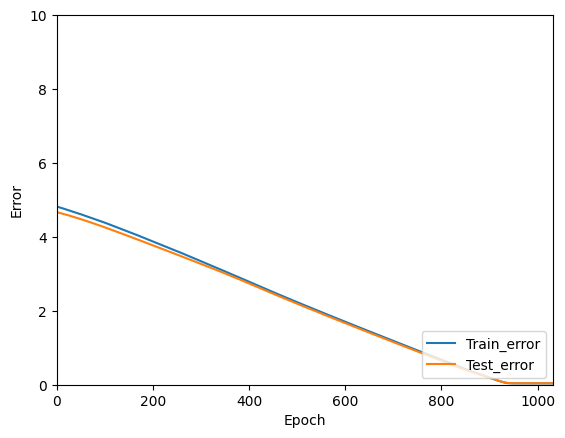

In [7]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, len(history.history['mean_absolute_error'])])
plt.ylim([0, 10])
plt.legend(loc='lower right')

results = model.evaluate(x_test, y_test, verbose = 0)
print(round(results[0],7))
print(round(results[1], 7))

# Problem 1: weight W1 and bias W0

# W1 = -3.0080063, W0(bias) = 4.9983497

In [8]:
W = model.layers[1].get_weights()
print(W)

[array([[-3.0080063]], dtype=float32), array([4.9983497], dtype=float32)]


# Problem 2
In this problem, we will explore an extended linear regression: $y_n=w_0 +w_1x_n+w_2x_n^2$, where $n=1,\dots, N$ is the index of the data sample. Your task is to determine the appropriate values of $w_0$, $w_1$, and $w_2$ for the given data samples in Lab1_2.csv.

Requirments:
*   You are required to use gradient descent algorithm to complete this problem.
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$, $w_1$, and $w_2$, (3) the obtained training error, and (4) the obtained testing error.

In [9]:
# Obtain your data samples
data2=pd.read_csv('sample_data/Lab1_2.csv') # you may need to change the path
x_data = data2['x'].values
x2_data = np.power(x_data, 2)
x_final_data = np.stack([x_data, x2_data], axis = 1)
# x_final_data = pd.DataFrame(x_final_data, columns = ['X','power_X'])

p2_y_data = data2['y'].values

print(x_final_data.shape)
print(x_final_data[:5])
print()
# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples). You can change to other percentage value as long as test_size <=0.3.
p2_x_train, p2_x_test, p2_y_train, p2_y_test = train_test_split(x_final_data, p2_y_data, test_size=0.3)

(200, 2)
[[2.08940756 4.36562394]
 [0.858418   0.73688147]
 [0.68055436 0.46315424]
 [1.65394431 2.73553177]
 [2.15840691 4.65872039]]



In [10]:
# Gradient-descent solution
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model2 = models.Sequential()
model2.add(layers.Normalization(input_shape=(2,), axis=None)) # tighter, limiting the data into specific range
model2.add(layers.Dense(1 ,activation = 'relu'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6 (28.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [11]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=33)
adam2 = optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer = adam2,
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history2 = model2.fit(p2_x_train, p2_y_train, epochs=2100, validation_data=(p2_x_test, p2_y_test), callbacks=[callback2])

Epoch 1/2100
5/5 [==============================] - 1s 43ms/step - loss: 11.5018 - mean_absolute_error: 11.5018 - val_loss: 10.0056 - val_mean_absolute_error: 10.0056
Epoch 2/2100
5/5 [==============================] - 0s 13ms/step - loss: 11.2558 - mean_absolute_error: 11.2558 - val_loss: 9.7943 - val_mean_absolute_error: 9.7943
Epoch 3/2100
5/5 [==============================] - 0s 11ms/step - loss: 11.0069 - mean_absolute_error: 11.0069 - val_loss: 9.5833 - val_mean_absolute_error: 9.5833
Epoch 4/2100
5/5 [==============================] - 0s 16ms/step - loss: 10.7764 - mean_absolute_error: 10.7764 - val_loss: 9.3704 - val_mean_absolute_error: 9.3704
Epoch 5/2100
5/5 [==============================] - 0s 15ms/step - loss: 10.5339 - mean_absolute_error: 10.5339 - val_loss: 9.1579 - val_mean_absolute_error: 9.1579
Epoch 6/2100
5/5 [==============================] - 0s 11ms/step - loss: 10.2937 - mean_absolute_error: 10.2937 - val_loss: 8.9452 - val_mean_absolute_error: 8.9452
Epoch 7/

# Problem2_ERROR

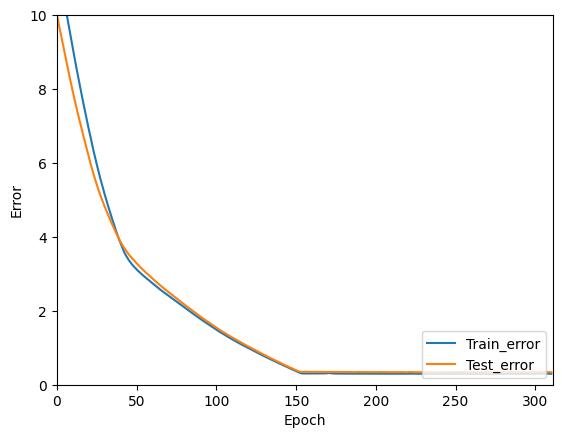

In [64]:
# Visualize performance evaluation
plt.plot(history2.history['mean_absolute_error'], label='Train_error')
plt.plot(history2.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, len(history2.history['mean_absolute_error'])])
plt.ylim([0, 10])
plt.legend(loc='lower right')

# Problem 2: weight W1, W2 and bias WO

# W1 = 2.0302355, W0(bias) = -2.999611
# W2 = 4.991711

In [13]:
W2 = model2.layers[1].get_weights()
print(W2)

[array([[2.0302355],
       [4.991711 ]], dtype=float32), array([-2.999611], dtype=float32)]


# **Problem 3**
In this problem, we will explore to use extended linear regression: $y_n=w_0 +\sum_{k=1}^Kw_kx_{n,k}$ to solve a real-world problem on stock forecasting. Your task is predict the Close value based on the Open, High, and Low values given in Lab1_3.csv.  
Requirments:
*   You are required to use gradient descent algorithm to complete this problem.
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$, $w_1$, ..., $w_K$ , (3) the obtained training error, and (4) the obtained testing error.

In [61]:
# Import Datadata=pd.read_csv('sample_data/Lab1_3.csv')
data3 = pd.read_csv('sample_data/Lab1_3.csv') # you may need to change the path
p3_x_data = data3[['Open','High','Low']]
print(p3_x_data.shape)
p3_y_data = data3['Close']
# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples). You can change to other percentage value as long as test_size <=0.3.
p3_x_train, p3_x_test, p3_y_train, p3_y_test = train_test_split(p3_x_data, p3_y_data, test_size=0.3)

(253, 3)


In [62]:
# Gradient-descent solution
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model3 = models.Sequential()
model3.add(layers.Normalization(input_shape=(3,), axis=None)) # tighter, limiting the data into specific range
model3.add(layers.Dense(1 ,activation = 'relu'))

model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_18 (Normaliz  (None, 3)                 3         
 ation)                                                          
                                                                 
 dense_18 (Dense)            (None, 1)                 4         
                                                                 
Total params: 7 (32.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [63]:
callback3 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

adam3 = optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer = adam3,
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history3 = model3.fit(p3_x_train, p3_y_train, epochs=3500,
                    validation_data=(p3_x_test, p3_y_test), callbacks=[callback3])

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 16ms/step - loss: 7.1544 - mean_absolute_error: 7.1544 - val_loss: 6.8383 - val_mean_absolute_error: 6.8383
Epoch 1002/3500
6/6 [==============================] - 0s 15ms/step - loss: 7.1562 - mean_absolute_error: 7.1562 - val_loss: 6.8872 - val_mean_absolute_error: 6.8872
Epoch 1003/3500
6/6 [==============================] - 0s 13ms/step - loss: 7.1602 - mean_absolute_error: 7.1602 - val_loss: 6.8734 - val_mean_absolute_error: 6.8734
Epoch 1004/3500
6/6 [==============================] - 0s 16ms/step - loss: 7.1526 - mean_absolute_error: 7.1526 - val_loss: 6.7979 - val_mean_absolute_error: 6.7979
Epoch 1005/3500
6/6 [==============================] - 0s 13ms/step - loss: 7.1713 - mean_absolute_error: 7.1713 - val_loss: 6.8411 - val_mean_absolute_error: 6.8411
Epoch 1006/3500
6/6 [==============================] - 0s 17ms/step - loss: 7.1340 - mean_absolute_error: 7.1340 - val_loss: 6.9514 - v

# Problem3_ERROR

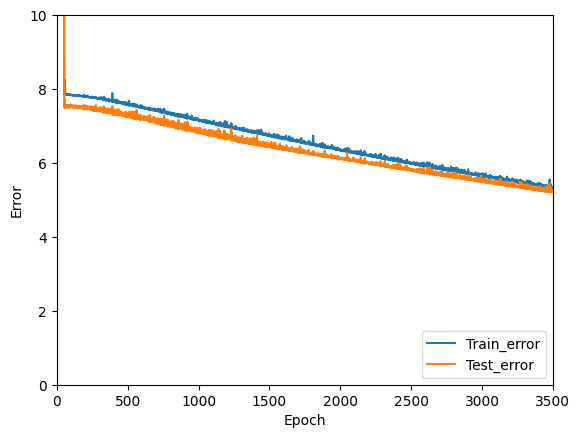

In [65]:
# Visualize performance evaluation
plt.plot(history3.history['mean_absolute_error'], label='Train_error')
plt.plot(history3.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, len(history3.history['mean_absolute_error'])])
plt.ylim([0, 10])
plt.legend(loc='lower right')

# Problem 3: weight W1, W2, W3 and bias WO

# W1 = 0.11998695, W0(bias) = -0.46642128
# W2 = 0.226426
# W3 = 0.6657866

In [66]:
W3 = model3.layers[1].get_weights()
print(W3)

[array([[0.11998695],
       [0.226426  ],
       [0.6657866 ]], dtype=float32), array([-0.46642128], dtype=float32)]
